In [74]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.base import clone


Reference
This tech report (Chapter 3) describes the dataset and the methodology followed when collecting it in much greater detail. Please cite it if you intend to use this dataset. 
Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.

https://www.cs.toronto.edu/~kriz/cifar.html

In [75]:
f = open('cifar-10-batches-py/data_batch_1', 'rb')
datadict = pickle.load(f,encoding='latin1')
f.close()
X_train = datadict["data"]
Y_train = datadict['labels']

In [76]:
f = open('cifar-10-batches-py/test_batch', 'rb')
datadict = pickle.load(f,encoding='latin1')
f.close()
X_test = datadict["data"]
Y_test = datadict['labels']

In [77]:
# Models we will use
logistic = LogisticRegression(solver='lbfgs', max_iter=10000,
                                           multi_class='multinomial')
rbm = BernoulliRBM(random_state=0, verbose=True)

rbm_features_classifier = Pipeline(
    steps=[('rbm', rbm), ('logistic', logistic)])


In [78]:
# #############################################################################
# Training

# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.06
rbm.n_iter = 20
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100
logistic.C = 6000

# Training RBM-Logistic Pipeline
rbm_features_classifier.fit(X_train, Y_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -5340062.50, time = 4.80s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -10681865.12, time = 5.18s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -16023667.74, time = 5.27s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -21365470.36, time = 4.96s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -26707272.98, time = 5.07s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -32049075.60, time = 4.88s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -37390878.22, time = 4.90s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -42732680.83, time = 4.84s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -48074483.45, time = 4.94s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -53416286.07, time = 5.01s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -58758088.69, time = 4.81s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -64099891.31, time = 4.96s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -69441693.93, time = 5.11s
[BernoulliRBM] Iterati

Pipeline(memory=None,
     steps=[('rbm', BernoulliRBM(batch_size=10, learning_rate=0.06, n_components=100, n_iter=20,
       random_state=0, verbose=True)), ('logistic', LogisticRegression(C=6000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])

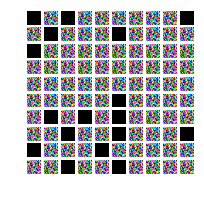

In [70]:
#https://stackoverflow.com/questions/35995999/why-cifar-10-images-are-not-displayed-properly-using-matplotlib
rbm_comp = rbm.components_.reshape(100, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
Y = np.array(Y)

#Visualizing CIFAR 10
fig, axes1 = plt.subplots(10,10,figsize=(3,3))
i = 0
for j in range(10):
    for k in range(10):
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(rbm_comp[i:i+1][0])
        i += 1

In [66]:
len(rbm.components_)


100

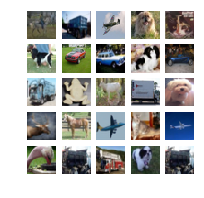

In [79]:
#https://stackoverflow.com/questions/35995999/why-cifar-10-images-are-not-displayed-properly-using-matplotlib
X_train = X_train.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
Y_train = np.array(Y_train)

#Visualizing CIFAR 10
fig, axes1 = plt.subplots(5,5,figsize=(3,3))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X_train)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X_train[i:i+1][0])